In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Lab 6

For the LHC data, let us fake a background with a Poisson distribution of mean 100. I chose to create a sample of 1 million random poisson distributed data points.

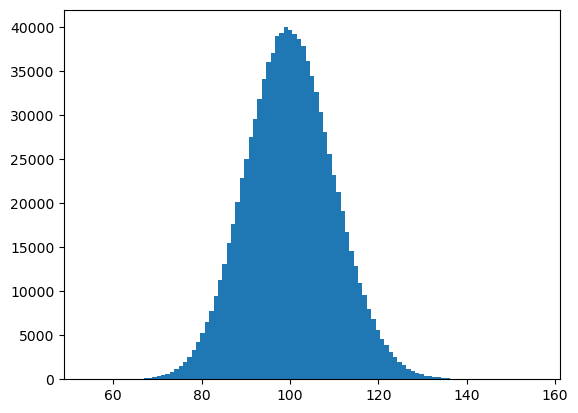

In [2]:
bkgd = stats.poisson.rvs(100, size = 1000000)
plt.hist(bkgd, bins = max(bkgd) - min(bkgd) + 1);

## Problem 1

Here we shall determine where the $5\sigma$ sensitivity threshold is.

In [3]:
probability = stats.norm.cdf(5)
stats.poisson.ppf(probability, mu = 100)

154.0

## Problem 2

Now we inject a signal of known strength, somewhere in the 8-30 $\sigma$ range, then inject it into our background data many times.

In [4]:
minProb = stats.norm.cdf(8)
maxProb = stats.norm.cdf(30)
print(stats.poisson.ppf(minProb, mu = 100))
print(stats.poisson.ppf(maxProb, mu = 100))

190.0
inf


According to our calculations, as long as our signal is within the values of 190 to near infinity (likely due to machine precision), then we are in the range we desire.

Similar to what we did in homework 5, let us inject a signal, starting at a minimum value of 190. Considering our background data, as well as the data from the LHC, is modeled with a Poisson, let us inject a Poisson distributed signal centered at an arbitrary value of 230.

Text(0.5, 1.0, 'Observed Signal')

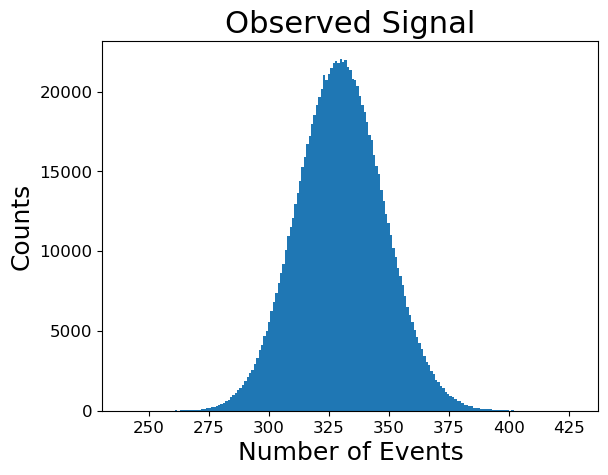

In [5]:
signal = stats.poisson.rvs(mu = 230, size = 1000000)
observed = bkgd + signal
plt.hist(observed, bins = max(observed) - min(observed) + 1);
plt.tick_params(labelsize = 12)
plt.xlabel("Number of Events", size= 18)
plt.ylabel("Counts", size=18)
plt.title("Observed Signal", size=22)

### a)
This is how bright our observed signal appears to be. It appears to be Gaussian-like, but that makes sense due to Central Limit Theorem with both the background and our signal having high values of $\mu$, even if it is not a perfect match for a Gaussian shape.

What this histogram tells us, is that our injected signal with a mean centered at 230 is affected by the background signal. So our observed signal appears to be brighter than it really is, according to the addition of the background signal (with the background mean centered at 100, so the mean of the observed being at 230 + 100 = 330 instead).

In [6]:
print(min(bkgd))
print(max(observed))

54
428


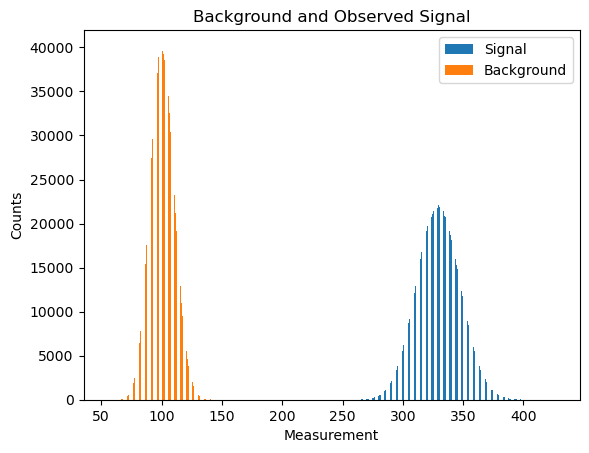

In [7]:
plt.hist([observed, bkgd], bins = (max(observed) - min(bkgd) + 1), label=['Signal', 'Background'])
plt.title("Background and Observed Signal")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

### b)
The observed value is NOT equally likely to be stronger or weaker than the true injected signal. By looking at our observed signal, it has a mean centered at a larger value than the mean of our injected signal.

The reason we can also say that it will usually be stronger than our injected signal is because the observed signal is also very symmetric in nature, as well as our observed signal. So the distribution of the observed signal will tend to be larger than the true injected signal.

## Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data.

Earlier, when we tried to calculate $30\sigma$, due to machine precision we got inf. So let's choose an arbitrarily large value much larger than $8\sigma$, which was 190. Let us choose a value of 400.

We choose a suite of injected signal strength from a large range of values from 0 to 400. We inject a million uniformly distributed signals to then plot the values of our observed signal versus the known injected signal we constructed.

ValueError: too many values to unpack (expected 3)

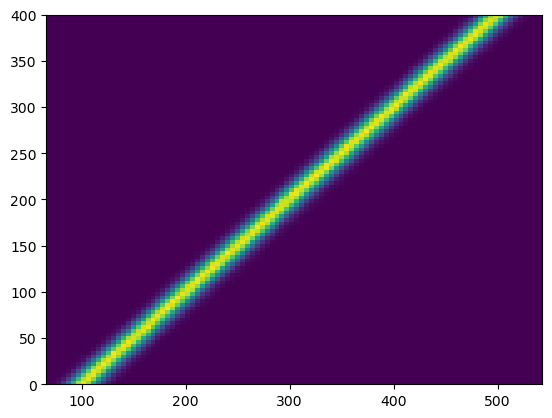

In [38]:
injection = np.linspace(0, 400, 1000000)

observed = bkgd + injection

h, xEdges, yEdges = plt.hist2d(observed, injection, bins = 100, density=True)

datacenters = (xEdges[:-1] + xEdges[1:]) / 2
signalcenters = (yEdges[:-1] + yEdges[1:]) / 2
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.title("Confidence intervals", size = 22)
plt.show()

### b) For the same injected signal power as in problem 2, show that you get the same answer.

Here we can model a uniform signal with the same mean as the observed signal in problem 2. When we subtract the background from this uniform signal, this is what we get.

Text(0.5, 1.0, 'Subtracted Data')

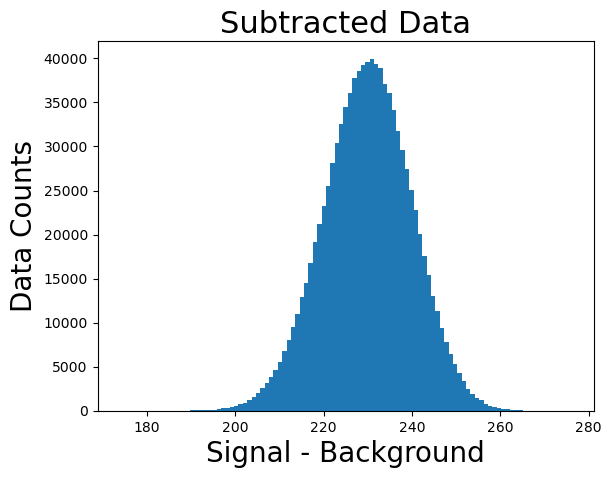

In [34]:
signal = np.ones(1000000)*(330) # this 400 is the maximum value in our range of injected signals
injectedSignal = signal - bkgd

plt.hist(injectedSignal, bins = (max(injectedSignal) - min(injectedSignal) + 1).astype(np.int64))
plt.ylabel('Data Counts', fontsize = 20)
plt.xlabel('Signal - Background', fontsize = 20)
plt.title("Subtracted Data", size = 22)

Here we can see we get the original injected signal back! We subtract the background data, and we get our known injected signal, which was originally centered at 230.

### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

(array([[3.66889543e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41514538e-06, 3.66889543e-07, 1.57238376e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.82197685e-06, 1.99168609e-06, 2.62063959e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.24127918e-08, 2.09651167e-07, 8.91017461e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.62063959e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.24127918e-08]]), array([ 66.06720007,  70.83702803,  75.60685599,  80.37668395,
        85.14651191,  89.91633987,  94.68616783,  99.45599579,
       104.22582375, 108.99565171, 113.76547967, 118.53530763,
       123.30513559, 128.07496354, 132.8447915 , 137.61461946,
       142.38444742, 147.